# Save the cropped image for aquabyte data in grayscale

In [2]:
import ujson as json
import os
%matplotlib inline
import utils
import matplotlib.pyplot as plt
from utils import *
from __future__ import division, print_function
from shutil import copyfile
from sklearn.metrics import log_loss
import pandas as pd
from glob import glob

In [3]:
from keras.utils import get_file
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.
/home/paperspace/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# save the source path and export path 
source path - crop the images around the bounding boxes and then save in source path

export path -  save the converted gray scale images here

In [4]:
root_dir = os.path.dirname("/home/paperspace/Documents/insight/") 
source_path = root_dir+"/crop_aqb/Train_crop/"  # path to the cropped images that we get after cropping around bounding boxes
export_path = root_dir+"/crop_aqb/Train_gray/"  #path to store the converted gray pictures

In [5]:
classes = os.listdir(source_path)
classes = [x for x in os.listdir(source_path) if not x.startswith('.')]
print ('The classes are : ',classes)

The classes are :  ['Fish_3', 'Fish_1', 'Fish_2', 'Fish_5', 'Fish_4']


## Computer vision application
Norway salmon have freckles on their face which act as fingerprints to them and help identify each individual salmon.
So, I use adaptive Threshold to make the freckles on the face more prominent. Adaptive thresholding algorithm calculates different thresholds for different regions of the same image and it gives us better results for than normal thresholding for images with varying illumination.

In [12]:
for folder in glob(os.path.join(source_path, '*')):
     
        for f in glob(os.path.join(folder, '*.png')):
            img = cv2.imread(f)       
            gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img1 = cv2.medianBlur(gray_image,3)
            th = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
            foldername = folder.split('/')[-1]
            filename = f.split('/')[-1]
            #print (export_path+foldername+'/'+filename)
            cv2.imwrite(export_path+foldername+'/'+filename,th)    

##  Data visualization

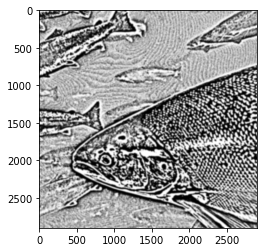

In [18]:
image = cv2.imread(source_path+'Fish_1/Basler acA4112-8gc (40003213)_20180326_134801204_0246-Copy1.png',1) 
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(gray_image,3)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
plt.imshow(th, cmap = 'gray',interpolation = 'bicubic')


In [13]:
test = cv2.imread(export_path+'Fish_1/Basler acA4112-8gc (40003213)_20180326_134801204_0247-Copy1.png',0)

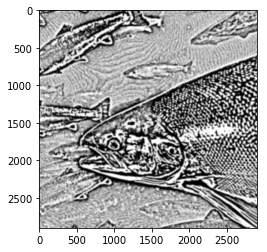

In [14]:
plt.imshow(test, cmap = 'gray',interpolation = 'bicubic')